# Lista 7

### Algorytmy i struktury danych

#### Urszula Spik i Natalia Jelito

In [645]:
import sys
import pydot
from PIL import Image
from io import BytesIO

<span style="color:Red">*Aby działał pydot konieczna jest bibliteka graphviz dodana do ścieżki!*</span>

Klasy pomocniczne wykorzystywane podczas rozwiązywania listy:

ProrityQueue była stosowana na wykładzie.
Poniższa implementacja pochodzi z książki stanowiącej materiały do wykładu.

In [646]:
class PriorityQueue:
    def __init__(self):
        self.heapArray = [(0,0)]
        self.currentSize = 0

    def buildHeap(self,alist):
        self.currentSize = len(alist)
        self.heapArray = [(0,0)]
        for i in alist:
            self.heapArray.append(i)
        i = len(alist) // 2            
        while (i > 0):
            self.percDown(i)
            i = i - 1
                        
    def percDown(self,i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapArray[i][0] > self.heapArray[mc][0]:
                tmp = self.heapArray[i]
                self.heapArray[i] = self.heapArray[mc]
                self.heapArray[mc] = tmp
            i = mc
                
    def minChild(self,i):
        if i*2 > self.currentSize:
            return -1
        else:
            if i*2 + 1 > self.currentSize:
                return i*2
            else:
                if self.heapArray[i*2][0] < self.heapArray[i*2+1][0]:
                    return i*2
                else:
                    return i*2+1

    def percUp(self,i):
        while i // 2 > 0:
            if self.heapArray[i][0] < self.heapArray[i//2][0]:
                tmp = self.heapArray[i//2]
                self.heapArray[i//2] = self.heapArray[i]
                self.heapArray[i] = tmp
            i = i//2
 
    def add(self,k):
        self.heapArray.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def delMin(self):
        retval = self.heapArray[1][1]
        self.heapArray[1] = self.heapArray[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapArray.pop()
        self.percDown(1)
        return retval
        
    def isEmpty(self):
        if self.currentSize == 0:
            return True
        else:
            return False

    def decreaseKey(self,val,amt):
        done = False
        i = 1
        myKey = 0
        while not done and i <= self.currentSize:
            if self.heapArray[i][1] == val:
                done = True
                myKey = i
            else:
                i = i + 1
        if myKey > 0:
            self.heapArray[myKey] = (amt,self.heapArray[myKey][1])
            self.percUp(myKey)
            
    def __contains__(self,vtx):
        for pair in self.heapArray:
            if pair[1] == vtx:
                return True
        return False

In [647]:
class Stack:
    def __init__(self):
        """
        Create stack
        """
        self.items = []

    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items == []

    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)

    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()

    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items[len(self.items)-1]

    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return len(self.items)

    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

In [648]:
class Queue:
    """
    Class with queue where the end of the queue
    is at the top of the list
    """
    def __init__(self):
        """
        Create queue
        """
        self.items = []

    def isEmpty(self):
        """
        Check if queue is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return not self.items

    def enqueue(self, item):
        """
        Add item to the end of the queue

        Args:
            item: item to add
        """
        self.items.insert(0, item)

    def dequeue(self):
        """
        Delate the item that came first 

        Returns:
            Delated item
        """
        return self.items.pop()

    def size(self):
        """
        Check size of queue

        Returns:
            (int): number of item in queue
        """
        return len(self.items)

    def __str__(self):
        """
        Show queue in str form

        Returns:
            (str): str form of queue
        """
        return str(self.items)

### <span style="color:Pink"> Zadanie 1 </span>

**Treść polecenia**:

Zaimplementuj własną klasę Graph o własnościach podanych na wykładzie

**Infotmacje:**

* Graph() – tworzy pusty graf
* addVertex(vert) – dodaje węzeł do grafu
* addEdge(fromVert, toVert, weight) – dodaje krawędź do grafu
* addVertices(list_of_vert) – dodaje węzły z listy 
* addEdges(list_of_edges) – dodaje krawędzie z listy
* getVertex(vertKey) – znajduje wierzchołek o podanym kluczu
* getVertices() – lista wszystkich wierzchołków
* getEdges() – lista wszystkich krawędzi
* In - sprawdza czy wierzchołek jest w grafie

### <span style="color:Pink"> Zadanie 2 </span>

**Treść polecenia**:

Dodaj do powyższej klasy metodę generującą reprezentację grafu w
języku dot. Użyj programu graphviz (lub jego wersji online: http://
www.webgraphviz.com/) do przedstawienia wyniku na rysunku.

In [649]:
class Vertex:
    """
    Class of vertex to graph
    """
    
    def __init__(self,key):
        """
        Create vertex
        
        Args:
            key: key of vertex
        """
        self.id = key
        self.connectedTo = {}
        self.color = 'white'       
        self.dist = sys.maxsize    
        self.pred = None           
        self.disc = 0              
        self.fin = 0               

    def addNeighbor(self,nbr,weight=0):
        """
        Add connected neighbor to vertex
        
        Args:
            nbr: key of neighbor
            weight: weight of connection
        """
        self.connectedTo[nbr] = weight

    def __str__(self):
        """
        Str form of vertex
        """
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        """
        Give keys of connected neighbours
        
        Returns
            keys of connected neighbour
        """
        return self.connectedTo.keys()

    def getId(self):
        """
        Give id of vertex
        
        Returns:
            key of vertex
        """
        return self.id

    def getWeight(self,nbr):
        """
        Give weight of connection between vertex and neighbour
        
        Returns:
             weight of connection
        """
        return self.connectedTo[nbr]

    def setColor(self,color):
        """
        Sets collor of vertex

        Args:
            color ([str]): color of vertex
        """
        self.color = color

    def setDistance(self,d):
        """
        Sets distance (from beginning)

        Args:
            d (int): distance
        """
        self.dist = d

    def setPred(self,p):
        """
        Sets predecessor of vertex

        Args:
            p (Vertex): predecessor of vertex
        """
        self.pred = p

    def setDiscovery(self,dtime):
        """
        Sets time of discovery

        Args:
            dtime (int): time of discovery
        """
        self.disc = dtime

    def setFinish(self,ftime):
        """
        Sets time of finishing processing

        Args:
            ftime (int): end of processing time
        """
        self.fin = ftime
    
    def getFinish(self):
        """
        Gives time of finishing processing of vertex

        Returns:
            (int): end of processing time
        """
        return self.fin

    def getDiscovery(self):
        """
        Gives discovery time

        Returns:
            (int): discovery time
        """
        return self.disc

    def getPred(self):
        """Gives predecessor of vertex

        Returns:
            (Vertex): predecessor of vertex 
        """
        return self.pred

    def getDistance(self):
        """
        Gives distance (from beginning)

        Returns:
            (int): index from beginning
        """
        return self.dist

    def getColor(self):
        """
        Gives color of vertex

        Returns:
            (str): color of vertex
        """
        return self.color

In [667]:
class Graph:
    """
    Class of graph
    """
    
    def __init__(self, directed = True):
        """
        Create graph
        
        Args:
            (bool): if graph is directed
        """
        
        self.vertList = {}
        self.numVertices = 0
        self.directed = directed
        self.time = 0

    def addVertex(self,vert):
        """
        Add vertex to graph
        
        Agrs:
            vert: key of vertex to add
        """
        if not vert in self.vertList.keys():
            self.numVertices = self.numVertices + 1
            newVertex = Vertex(vert)
            self.vertList[vert] = newVertex
            return newVertex
    
    def addVertices(self,list_of_vert):
        """
        Add vertices from list to graph
        
        Args:
            list_of_vert(list): list of key of vertices to add
        """
        for i in list_of_vert:
            self.addVertex(i)

    def getVertex(self,vertKey):
        """
        Give vertex from graph with specified key
        
        Args:
            vertKey: key of vertex to get
        """
        if vertKey in self.vertList:
            return self.vertList[vertKey]
        else:
            return None

    def __contains__(self,n):
        """
        Check if vertex is in graph
        
        Returns
            (bool): True - is in graph
        """
        return n in self.vertList

    def addEdge(self,fromVert,toVert,cost=0):
        """
        Add edge to graph
        
        Args
            fromVert: begin vertex key of connection
            toVert: end vertex key of connection
            cost: weight of connection
        """
        if self.directed:
            if fromVert not in self.vertList:
                nv = self.addVertex(fromVert)
            if toVert not in self.vertList:
                nv = self.addVertex(toVert)
            self.vertList[fromVert].addNeighbor(self.vertList[toVert], cost)
        else:
            if not (((toVert, fromVert, cost) in self.getEdges()) or fromVert == toVert):
                if fromVert not in self.vertList:
                    nv = self.addVertex(fromVert)
                if toVert not in self.vertList:
                    nv = self.addVertex(toVert)
                self.vertList[fromVert].addNeighbor(self.vertList[toVert], cost)
                self.vertList[toVert].addNeighbor(self.vertList[fromVert], cost)
                
        
    def addEdges(self, list_of_edges):
        """
        Add edges from the list
        
        Args:
            list_of_edges (list):
            list of tuples with begin vertex, end vertex 
            and cost of connection
        """
        for i in list_of_edges:
            if len(i) == 3:
                self.addEdge(i[0], i[1], i[2])
            else:
                self.addEdge(i[0], i[1])
            
    def getEdges(self):
        """
        Give list of edges in graph
        """
        edgList = []

        for i in self.vertList:
            connect = [k for k in self.vertList[i].connectedTo]
            for j in range(0, len(self.vertList[i].getConnections())):
                if not self.directed and (connect[j].id, self.vertList[i].getId(), self.vertList[i].getWeight(connect[j])) in edgList:
                    pass
                else:
                    edgList.append((self.vertList[i].getId(), connect[j].id, self.vertList[i].getWeight(connect[j])))
        return edgList

    def getVertices(self):
        """
        Give key of vertices in graph
        
        Returns:
            (dict_keys): keys of vertices
        """
        return list(self.vertList.keys())

    def __iter__(self):
        """
        Overload of iteration operator
        """
        return iter(self.vertList.values())

    def graphColorCleaner(self, color="white"):
        """
        Change color of all vertices to one
        
        Args:
            color (str): color for all vertices 
        """
        for v in self.vertList:
            self.getVertex(v).setColor(color)

#Zadanie 2
    def generateDotgraph(self, weight=True):
        """
        Generate graph representation in dot language.
        To generate image use graphviz programm or
        its online version http://www.webgraphviz.com
        """
        if self.directed:
            s = "->"
            dotgraph = "digraph"
        else:
            s = "--"
            dotgraph = "graph"
        dotgraph += ' G {node [style=filled] '

        for i in self.vertList:
            fcolor = "black"
            if self.vertList[i].color == "black":
                fcolor = "white"
            dotgraph += f"\"{self.vertList[i].getId()}\" [fillcolor=\"{self.vertList[i].color}\" fontcolor=\"{fcolor}\" ] "
        for i in self.getEdges():
            dotgraph += f"\"{i[0]}\" {s} \"{i[1]}\" "
            if weight:
                dotgraph += f"[label=\"{i[2]}\"] "
        return dotgraph+"}"

    def graphImage(self, weight=True):
        """
        Give image of graph
        
        Args:
            weight (bool): if weight on graph
        """
        dot = self.generateDotgraph(weight)
        graph = pydot.graph_from_dot_data(dot)
        png_string = graph[0].create_png()
        return Image.open(BytesIO(png_string))

#Zadanie 3
    def bfs(self,start:Vertex):
        """
        Breadth-first search

        Args:
            start (Vertex): starting vertex

        Returns:
            (tuple): (x, y) where x is list of processing order and y is list of images after every step
        """
        self.graphColorCleaner() 
        images = []
        order_list = []
        start.setDistance(0)
        start.setPred(None)
        vertQueue = Queue()
        vertQueue.enqueue(start)
        images.append(self.graphImage(weight=False))
        while (vertQueue.size() > 0):
            currentVert = vertQueue.dequeue()
            currentVert.setColor('gray')
            images.append(self.graphImage( weight=False))
            for nbr in currentVert.getConnections():      
                if (nbr.getColor() == 'white'):
                    nbr.setColor('gray')                           
                    nbr.setDistance(currentVert.getDistance() + 1)   
                    nbr.setPred(currentVert)                         
                    vertQueue.enqueue(nbr) 
                images.append(self.graphImage(weight=False))
            currentVert.setColor('black') 
            order_list.append(currentVert.id)
        images.append(self.graphImage(weight=False))
        return order_list, images
    
    def dfs(self):
        """
        Depth-first search

        Returns:
            (tuple): (x, y, z) where x is list of processing order,
            y is list of images after every step,
            z is list of times of processing vertexes
        """

        times = {}
        images = []
        order_list =[]
        for aVertex in self:
            aVertex.setColor('white')
            aVertex.setPred(-1)
            
        for aVertex in self:
            if aVertex.getColor() == 'white':
                self.dfsvisit(aVertex, images, times, order_list)
                images.append(self.graphImage(weight=False))

        for i in self.vertList:
            times[self.vertList[i].id] = self.vertList[i].fin

        return order_list, images, times

    def dfsvisit(self,startVertex, images, times, order_list):
        """
        Visiting vertexes

        Args:
            startVertex (Vertex): starting vertex
            images (list): list of images taken after every color change in graph
            times (list): list of processing times
            order_list (list): order of processing (end of processing)
        """
        startVertex.setColor('gray')
        images.append(self.graphImage(weight=False))
        self.time += 1
        startVertex.setDiscovery(self.time)
        for nextVertex in startVertex.getConnections():
            if nextVertex.getColor() == 'white':
                nextVertex.setPred(startVertex)
                self.dfsvisit(nextVertex, images, times, order_list)
                
        startVertex.setColor('black')
        order_list.append(startVertex.id)
        self.time += 1
        images.append(self.graphImage(weight=False))
        startVertex.setFinish(self.time)

#Zadanie 4
    def topologicall_sort(self):
        """
        Sorts graph topologically

        Returns:
            (list): list of sorted vertexes
        """
        if not self.directed:
            raise ValueError("Topological sorting can be only for directed graph")
        order_list, images, times = self.dfs()
        sorted_topo = sorted(times.items(), key=lambda x: x[1], reverse=True)
        return [sorted_topo[i][0] for i in range(len(sorted_topo))]

        
    def topologicallImage(self, weight=False):
        """
        Generates image of sorted topologically graph

        Args:
            weight (bool): if weight should be on image
            
        Returns:
            image of toplogically sorted graph
        """
        self.graphColorCleaner() 
        dot = self.generateDotgraph(weight)[:-1]+'{rank = same'
        topologic = self.topologicall_sort()
        for i in topologic:
            dot+=f' {i};'
        dot = dot[:-1]+"}}"
        graph = pydot.graph_from_dot_data(dot)
        png_string = graph[0].create_png()
        return Image.open(BytesIO(png_string))

**Przykład grafu nieskierowanego**

In [668]:
w = Graph(False)

In [669]:
w.addEdge(0,1)
w.addEdge(5,2)
w.addEdge(4,3)
w.addEdge(1,4)
w.addEdge(1,5)
w.addEdge(4,6)

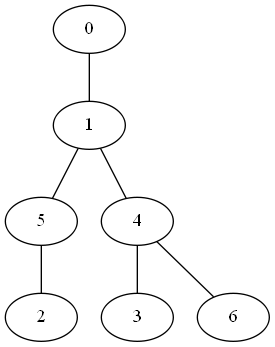

In [670]:
w.graphImage(weight=False)

In [676]:
1 in w

True

In [677]:
33 in w

False

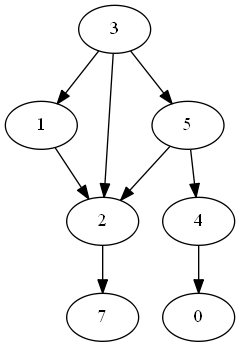

In [671]:
j = Graph()
j.addEdges([(3,1,5), (3,5,2), (1,2,4), (2,7,9), (3,2,7), (3,5,3), (4,0,1),(5,4,8), (5,2,1)])
j.graphImage(weight=False)

In [672]:
j.getEdges()

[(3, 1, 5),
 (3, 5, 3),
 (3, 2, 7),
 (1, 2, 4),
 (5, 4, 8),
 (5, 2, 1),
 (2, 7, 9),
 (4, 0, 1)]

In [673]:
j.getVertices()

[3, 1, 5, 2, 7, 4, 0]

In [674]:
22 in j

False

In [675]:
3 in j

True

### <span style="color:Pink"> Zadanie 3 </span>

**Treść polecenia**:

Rozbuduj klasę o metody przeszukiwania w głąb i wszerz.

#### PRZYKŁAD BFS

In [678]:
h = Graph()

In [679]:
h.addEdge(0,1)
h.addEdge(0,2)
h.addEdge(0,3)
h.addEdge(1,4)
h.addEdge(1,5)
h.addEdge(4,6)

In [680]:
h.getEdges()

[(0, 1, 0), (0, 2, 0), (0, 3, 0), (1, 4, 0), (1, 5, 0), (4, 6, 0)]

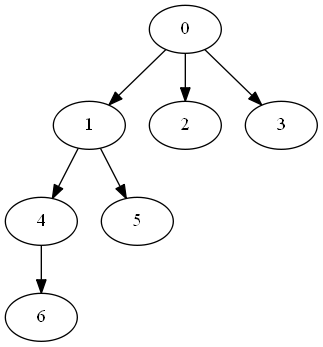

In [681]:
h.graphImage(weight=False)

In [682]:
bfs_list, images = h.bfs(h.getVertex(0))
print(bfs_list)
images[0].save('gify/BFS_1.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=300, loop=0)

[0, 1, 2, 3, 4, 5, 6]


<img src="gify/BFS_1.gif" width="200" align="center">

#### Przykład DFS

In [690]:
g = Graph()
for i in range(6):
    g.addVertex(i)

In [691]:
g.addEdges([(0,1,5), (0,5,2), (1,2,4), (2,3,9), (3,4,7), (3,5,3), (4,0,1),(5,4,8), (5,2,1)])

In [692]:
g.generateDotgraph()

'digraph G {node [style=filled] "0" [fillcolor="white" fontcolor="black" ] "1" [fillcolor="white" fontcolor="black" ] "2" [fillcolor="white" fontcolor="black" ] "3" [fillcolor="white" fontcolor="black" ] "4" [fillcolor="white" fontcolor="black" ] "5" [fillcolor="white" fontcolor="black" ] "0" -> "1" [label="5"] "0" -> "5" [label="2"] "1" -> "2" [label="4"] "2" -> "3" [label="9"] "3" -> "4" [label="7"] "3" -> "5" [label="3"] "4" -> "0" [label="1"] "5" -> "4" [label="8"] "5" -> "2" [label="1"] }'

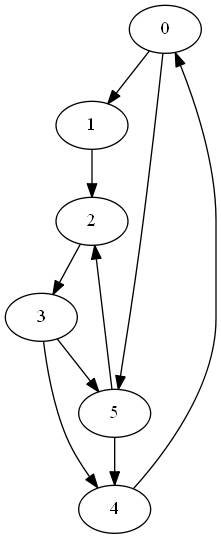

In [693]:
g.graphImage(False)

In [687]:
order, images2, times = g.dfs()
print(order)
images2[0].save('gify/DFS_1.gif',
               save_all=True, append_images=images2[1:], optimize=False, duration=300, loop=0)

[4, 5, 3, 2, 1, 0]


<img src="gify/DFS_1.gif" width="200" align="center">

In [688]:
order2, images3, times = h.dfs()
print(order2)
images3[0].save('gify/DFS_2.gif',
               save_all=True, append_images=images3[1:], optimize=False, duration=300, loop=0)

[6, 4, 5, 1, 2, 3, 0]


<img src="gify/DFS_2.gif" width="200" align="center">

### <span style="color:Pink"> Zadanie 4 </span>

**Treść polecenia**:

Zmodyfikuj metodę przeszukiwania w głąb tak, aby sortowała ona graf
topologicznie.

#### Sortowanie topologiczne

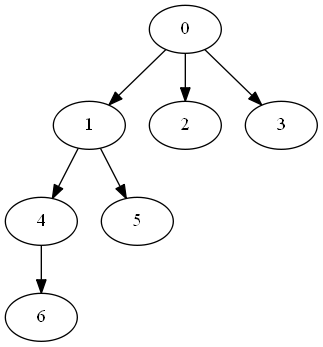

In [694]:
a = Graph()
for i in range(6):
    a.addVertex(i)
a.addEdge(0,1)
a.addEdge(0,2)
a.addEdge(0,3)
a.addEdge(1,4)
a.addEdge(1,5)
a.addEdge(4,6)
a.graphImage(weight=False)

In [695]:
a.topologicall_sort()

[0, 3, 2, 1, 5, 4, 6]

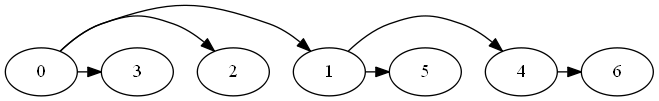

In [696]:
a.topologicallImage()

In [710]:
b = Graph()
b.addVertices([1, 2, 7, 8, 3, 6, 9, 12, 4, 5, 10, 11])
b.addEdges([(1, 2, 0), (1, 7, 0), (1, 8, 0), (2, 3, 0), (2, 6, 0), (3, 4, 0), (3, 5, 0), (8, 9, 0), (8, 12, 0), (9, 10, 0), (9, 11, 0)])

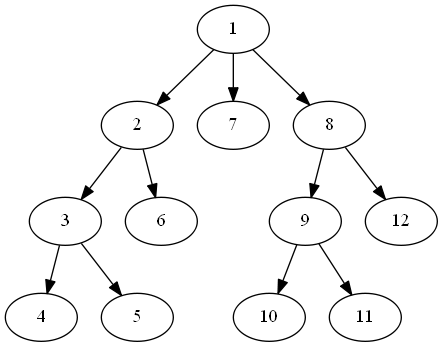

In [711]:
b.graphImage(False)

In [712]:
order, images4, times = b.dfs()
images4[0].save('gify/DFS_3.gif',
               save_all=True, append_images=images4[1:], optimize=False, duration=300, loop=0)

<img src="gify/DFS_3.gif" width="200" align="center">

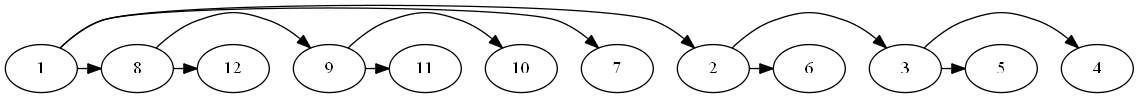

In [713]:
b.topologicallImage()

### <span style="color:Pink"> Zadanie 5 </span>

**Treść polecenia**:

Korzystając z przeszukiwania wszerz, stwórz algorytm wyliczający najkrótsze ścieżki od dowolnego węzła grafu do wszystkich pozostałych.

* **Główny algorytm - Algorytm Dijkstry**

In [714]:
def dijkstra(graph,start): 
    """
    Dijkstra's algorithm to find shortest way
    to each vertex
    
    Args:
        graph (Graph): graph to analyze
        start (Vertex): first vertex
    """
    queue = PriorityQueue()
    for v in graph:
        v.setDistance(sys.maxsize)
    start.setDistance(0)
    queue.buildHeap([(v.getDistance(),v) for v in graph])
    while not queue.isEmpty():
        currentVert = queue.delMin()
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance(newDist)
                nextVert.setPred(currentVert)
                queue.decreaseKey(nextVert,newDist)

* Prezentacja wyników

In [715]:
def dijkstra_printing(graph, start):
    """
    Function to showing dijkstra's algorithm results
    
    Args:
        graph (Graph): graph to analyze
        start (Vertex): first vertex
    """
    dijkstra(graph, graph.getVertex(start))
    print(f"Cost of path from {start}:")
    for v in graph:
        if v.id != start:
            print(f"to {v.id}: {v.getDistance()}")
    color = graph.getVertex(start).getColor()
    graph.getVertex(start).setColor("aquamarine2")
    display(graph.graphImage())
    graph.getVertex(start).setColor(color)    

**Przykład:**

In [718]:
mygraph = Graph()
mygraph.addVertices([0, 1, 2, 3, 4, 5])
mygraph.addEdges([(0,1,5), (0,5,2), (1,2,4), (2,3,9), (3,4,7), (3,5,3), (4,0,1), (5,4,8), (5,2,1)])

Cost of path from 0:
to 1: 5
to 2: 3
to 3: 12
to 4: 10
to 5: 2


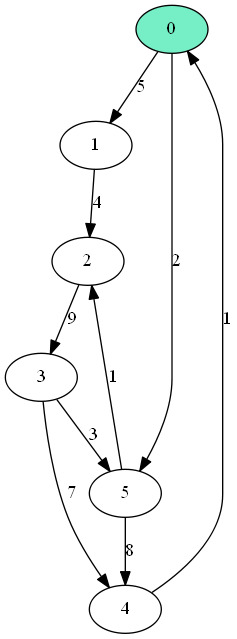

In [719]:
dijkstra_printing(mygraph, 0)

Cost of path from 4:
to 0: 1
to 1: 6
to 2: 4
to 3: 13
to 5: 3


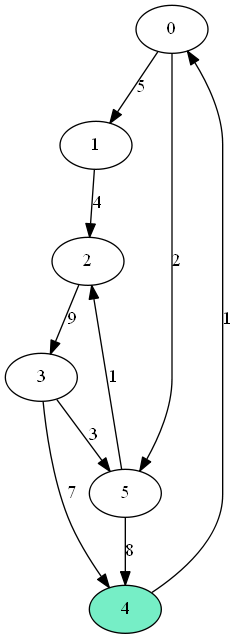

In [720]:
dijkstra_printing(mygraph, 4)

**Dodatkowe**

Przyjmijmy przy przedstawianiu wyników, że jest jakaś maksymalna długość ścieżki, jeśli ścieżka jest dłuższa, element jest przedstawiany na czerwonawo :)

* Prezentacja wyników

In [725]:
def dijkstra_printing_max(graph, start, max_cost):
    """
    Function to showing dijkstra's algorithm results
    with maximum path
    
    Args:
        graph (Graph): graph to analyze
        start (Vertex): first vertex
        max_cost (int): max length of path
    """
    dijkstra(graph, graph.getVertex(start))
    graph.graphColorCleaner()
    print(f"Cost of path from {start}:")
    for v in graph:
        if v.id != start:
            print(f"to {v.id}: {v.getDistance()}")
        if v.getDistance() > max_cost:
            v.setColor("indianred1")
    color = graph.getVertex(start).getColor()
    graph.getVertex(start).setColor("aquamarine2")
    display(graph.graphImage())

Cost of path from 1:
to 0: 21
to 2: 4
to 3: 13
to 4: 20
to 5: 16


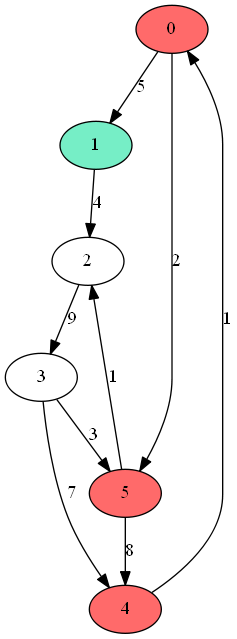

In [726]:
dijkstra_printing_max(mygraph, 1, 15)

Cost of path from 4:
to 0: 1
to 1: 6
to 2: 4
to 3: 13
to 5: 3


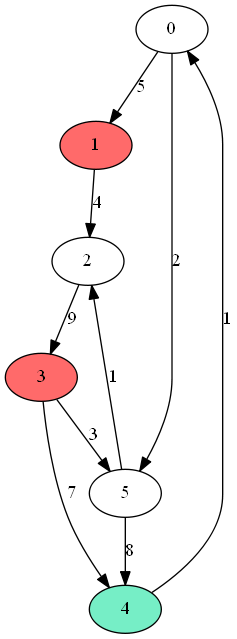

In [727]:
dijkstra_printing_max(mygraph, 4, 5)

Cost of path from 0:
to 1: 5
to 2: 3
to 3: 12
to 4: 10
to 5: 2


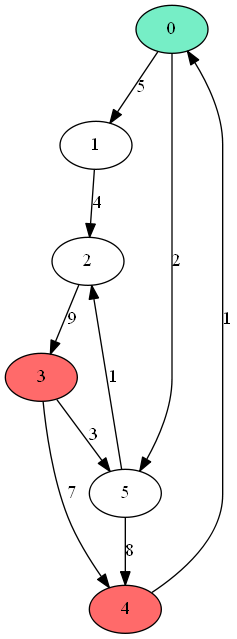

In [729]:
dijkstra_printing_max(mygraph, 0, 6)

### <span style="color:Pink"> Zadanie 6 </span>

**Treść polecenia**:

Korzystając z grafów, napisz program rozwiązujący zagadnienie misjonarzy i kanibalów (https://en.wikipedia.org/wiki/Missionaries_and_cannibals_problem).

In [730]:
def find_next_state(initial_state:tuple, start_point:tuple):
    """
    Finds new possible states

    Args:
        initial_state (tuple): current state
        start_point (tuple): state at the beginning

    Returns:
        list: list of tuples describing next states (new state and action made)
    """
    list_of_states =[]

    direction = -1 
    if initial_state[2]== 0:
        direction = 1
    for x in range(3):
        for y in range(3):
            new_state=(initial_state[0]+ direction * x, initial_state[1]+ direction * y, initial_state[2] + direction * 1)
            action = (x,y,direction)
            if x + y >= 1 and x + y <= 2 and valid(new_state, start_point):
                list_of_states.append((new_state, str(action)))
    return list_of_states
    
def killed(state, start_point): 
    """
    Checkes wheater to continue

    Args:
        state (tuple): current state
        start_point (tuple): state at the beginning

    Returns:
        bool: True if missionaries are killed
    """
    if state[1] > state [0] and state[0] > 0:
        return True
    if state[1] < state [0] and state[0] < start_point[0]:
        return True

def valid(state, start_point):
    """
    Checks if state is consistent with task

    Args:
        state (tuple): state to chceck
        start_point (tuple): situation at the beginning
    """
    return(state[0] <= start_point[0]) and (state[1] <= start_point[1]) and (0<= state[0])  and (0 <= state[1] )

def found_goal(state):
    """
    Checks if found solution((0,0,0))

    Args:
        state (tuple): state to check

    Returns:
        bool: True if state is (0,0,0)
    """
    return  state == (0,0,0)

In [731]:
def add_nbr(graph, current_state, start_point):
    """
    Adds children to current vertex

    Args:
        graph (Graph): graph we work with
        current_state (tuple): current situation
        start_point (tuple): situation at beginning
    """
    for i, action in  find_next_state(current_state, start_point):
        if (i not in graph):
            graph.addVertex(i)
            graph.addEdge(current_state, i, action)
            if found_goal(i):
                break

In [624]:
def river_problem_bfs(graph,start_state) :
    """
    Algorithm solving river problem with bfs

    Args:
        graph (Graph): graph used to solve problem
        start_state (tuple): state at the beginning

    Returns:
        tuple : last state
    """
    graph_list = []
    start_point = start_state
    start_state = graph.getVertex(start_state)
    start_state.setDistance(0)                            
    start_state.setPred(None)                             
    vertQueue = Queue()
    vertQueue.enqueue(start_state)                        
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()

        if found_goal(currentVert.getId()):
            return currentVert.getId()
            
        if not killed(currentVert.id, start_point):
            add_nbr(graph,currentVert.id, start_point) 
            for nbr in currentVert.getConnections(): 

                if (nbr.getColor() == 'white'):         
                    nbr.setColor('gray')      
                   
                    nbr.setDistance(currentVert.getDistance() + 1)   
                    nbr.setPred(currentVert)                         
                    vertQueue.enqueue(nbr)
                    graph_list.append(nbr.getId())
                    if found_goal(nbr.getId()):
                        return nbr.getId() 
                       
            currentVert.setColor('black')
            

    return currentVert.getId()


In [732]:
def new_color_river_graph(graph, start_point):
    """
    Colors graph with following rules:
        - red - missionaries are killed
        - blue - no new state possible
        - green - normally processed
        - yellow - goal vertex

    Args:
        graph (Graph): graph to color
        start_point (tuple): situation at the beginning

    Returns:
        Graph : colored graph
    """
    graph.graphColorCleaner()
    
    for vertex in graph:
        if killed(vertex.id, start_point):
            vertex.setColor("indianred1")
        elif vertex.getConnections():
            vertex.setColor("darkseagreen1")
        elif found_goal(vertex.id):
            vertex.setColor("yellow")
        else:
            vertex.setColor("lightblue")
    return graph
    

In [733]:
def find_path(graph): 
    """
    Finds Path to goal ( (0,0,0) ) if it is possible 

    Args:
        graph (Graph): Graph to proceed

    Returns:
        list: list of vertexes joing root (beginnng state) and goal ( (0,0,0) )
    """
    graph.graphColorCleaner()
    lista = []
    if (0,0,0) in graph:
        x = graph.getVertex((0,0,0))
        while (x.getPred()):
            lista.append(x.getId())
            x = x.getPred()
        lista.append(x.getId())
        lista.reverse()
        return lista

In [734]:
def river_solution(start_point:tuple):
    """
    Finds solutio of problem: path joining beginning and goal as well as colored graph 

    Args:
        start_point (tuple): beginning situation

    Returns:
        tuple: (x,y) where x is path and y is image 
    """
    graph = Graph()
    graph.addVertex(start_point)
    river_problem_bfs(graph,start_point)
    new_color_river_graph(graph, start_point)
    plt = graph.graphImage()
    path = find_path(graph)

    return path, plt

In [735]:
def visualization_river_problem(start_point):
    """
    Visualizes solution of problem.

    Args:
        start_point (tuple): situation at the beginning
    """
    path, image = river_solution(start_point)
    display(image)
    if path:
        print("Solution:" + str(path))
        solution = "In steps:\n"
        for element in path:
            if element[2] == 1:
                boat = "Boat on left side of river.\n"
            else:
                boat = "Boat on right side of river.\n"
            solution += f"{element[0]} missionaries and {element[1]} cannibals on the  left shore. " 
            solution += boat
        print(solution)
            
    else:
        print("No solution")    

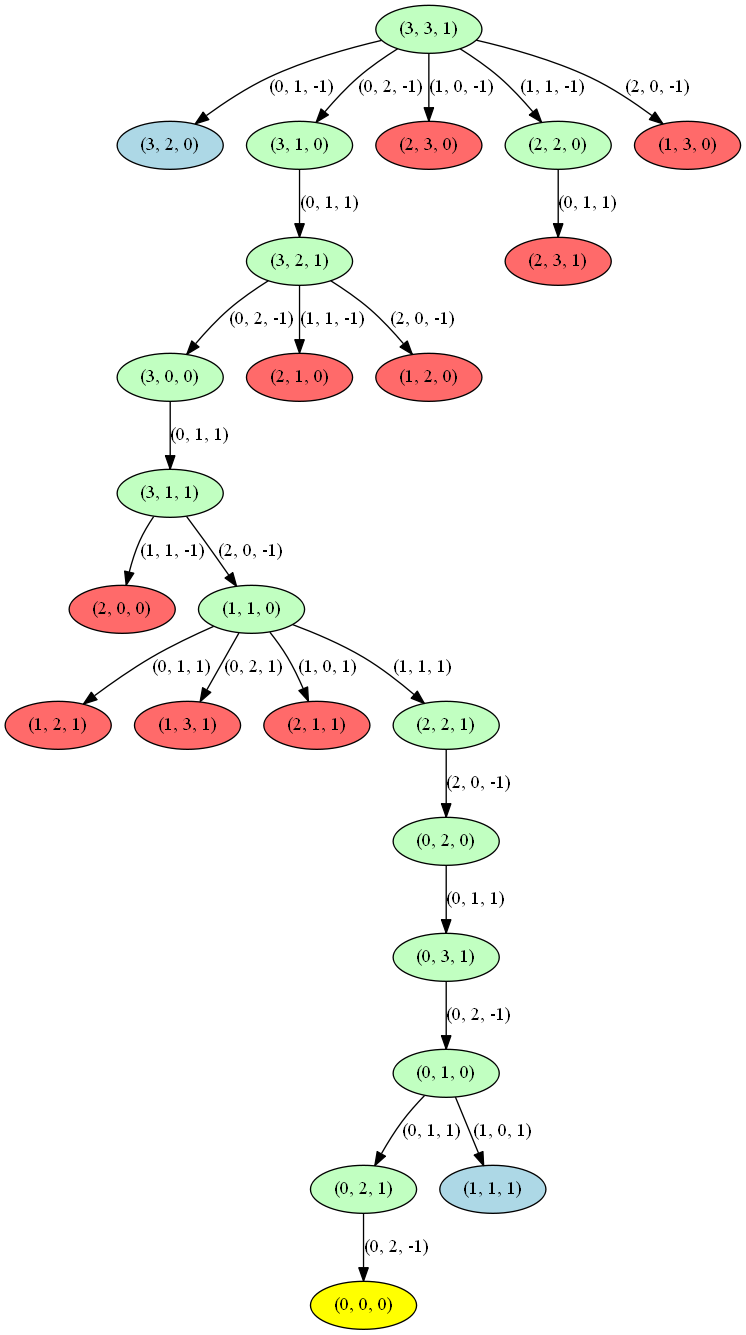

Solution:[(3, 3, 1), (3, 1, 0), (3, 2, 1), (3, 0, 0), (3, 1, 1), (1, 1, 0), (2, 2, 1), (0, 2, 0), (0, 3, 1), (0, 1, 0), (0, 2, 1), (0, 0, 0)]
In steps:
3 missionaries and 3 cannibals on the  left shore. Boat on left side of river.
3 missionaries and 1 cannibals on the  left shore. Boat on right side of river.
3 missionaries and 2 cannibals on the  left shore. Boat on left side of river.
3 missionaries and 0 cannibals on the  left shore. Boat on right side of river.
3 missionaries and 1 cannibals on the  left shore. Boat on left side of river.
1 missionaries and 1 cannibals on the  left shore. Boat on right side of river.
2 missionaries and 2 cannibals on the  left shore. Boat on left side of river.
0 missionaries and 2 cannibals on the  left shore. Boat on right side of river.
0 missionaries and 3 cannibals on the  left shore. Boat on left side of river.
0 missionaries and 1 cannibals on the  left shore. Boat on right side of river.
0 missionaries and 2 cannibals on the  left shore. Bo

In [736]:
visualization_river_problem((3,3,1))

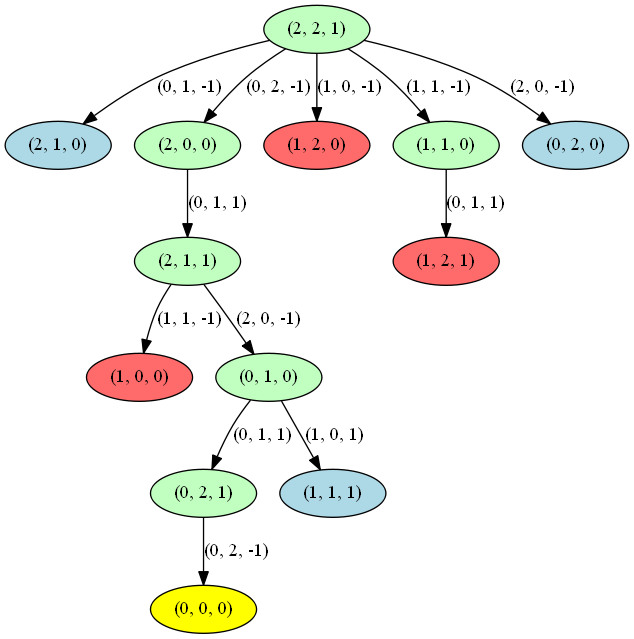

Solution:[(2, 2, 1), (2, 0, 0), (2, 1, 1), (0, 1, 0), (0, 2, 1), (0, 0, 0)]
In steps:
2 missionaries and 2 cannibals on the  left shore. Boat on left side of river.
2 missionaries and 0 cannibals on the  left shore. Boat on right side of river.
2 missionaries and 1 cannibals on the  left shore. Boat on left side of river.
0 missionaries and 1 cannibals on the  left shore. Boat on right side of river.
0 missionaries and 2 cannibals on the  left shore. Boat on left side of river.
0 missionaries and 0 cannibals on the  left shore. Boat on right side of river.



In [737]:
visualization_river_problem((2,2,1))

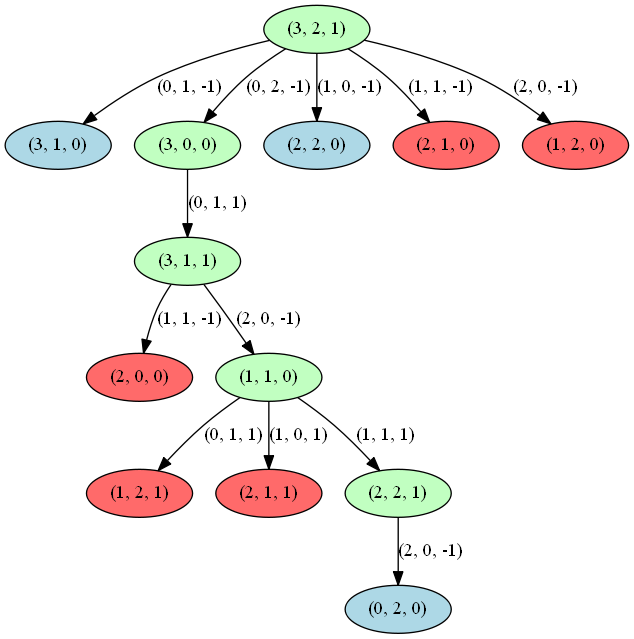

No solution


In [738]:
visualization_river_problem((3,2,1))

### <span style="color:Pink"> Zadanie 7 </span>

**Treść polecenia**:

Napisz program, który znajdzie sposób na odmierzenie dwóch litrów
wody przy użyciu dwóch kanistrów o objętości 3l i 4l

In [739]:
def is_found(carnisters:tuple, goal:int):
    """
    Check if goal is
    in one of carnisters
    
    Args:
        carnisters(tuple): water in carnisters
        goal(int): target amount of water
    
    Returns:
        (bool) True - there is
    """
    return goal in carnisters

In [740]:
def get_neighbors(carnisters:tuple, first:int, second:int):
    """
    Found neighbour of current state in carnisters
    
    Args:
        carnisters(tuple): current state in carnisters
        first(int): maximum of water in first carnister
        second(int): maximum of water in second carnister
    
    Returns:
        (list) list of neighbors of current state
    """
    f_to_s = min(carnisters[0], second - carnisters[1])
    s_to_f = min(carnisters[1], first - carnisters[0])
    operations = [(first, carnisters[1]),
                (carnisters[0], second),
                (0, carnisters[1]),
                (carnisters[0], 0),
                (carnisters[0] - f_to_s, carnisters[1] + f_to_s),
                (carnisters[0] + s_to_f, carnisters[1] - s_to_f),]
    neighbors = []
    for i in operations:
        if i != carnisters:
            neighbors.append(i)
    return neighbors

In [742]:
def set_neighbors(carnisters, g, first, second):
    """
    Set found neighbors to the graph.
    
    Args:
        carnisters(tuple): current state in carnisters
        g(Graph): graph tu set neighbors
        first(int): maximum of water in first carnister
        second(int): maximum of water in second carnister        
    """
    for i in get_neighbors(carnisters, first, second):
        if i not in g:
            g.addVertex(i)
        g.addEdge(carnisters, i, 0)

In [743]:
def search_bfs(g,start, goal, a, b):
    """
    Searching graph
    
    Args:
        g(Graph): graph to serach
        star(tuple):begining of serching
        goal(int): number of wather which is looking
        a(int): maximum of water in first carnister
        b(int): maximum of water in second carnister
        
    Returns:
        id of found vertex
    """
    graph_list = []
    start = g.getVertex(start)
    start.setDistance(0)                            
    start.setPred(None)                             
    vertQueue = Queue()
    vertQueue.enqueue(start)                        
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        if is_found(currentVert.getId(), goal):
            return currentVert.getId()
        set_neighbors(currentVert.id, g, a, b)   
        for nbr in currentVert.getConnections():    
            if (nbr.getColor() == 'white'):         
                nbr.setColor('gray')                             
                nbr.setDistance(currentVert.getDistance() + 1)   
                nbr.setPred(currentVert)                         
                vertQueue.enqueue(nbr)
                graph_list.append(nbr.getId())
        currentVert.setColor('black')
    return currentVert.getId()

In [744]:
def traverse(graph, vert, goal):
    """
    Find path which is looked for.
    
    Args:
        graph(Graph): graph with information about water
        vert: last vertex id with water
        goal(int): target amount of water
        
    Returns:
        (list): list of steps
    """
    graph.graphColorCleaner()
    if not is_found(vert, goal):
        return []
    lista = []
    x = graph.getVertex(vert)
    while (x.getPred()):
        lista.append(x.getId())
        x = x.getPred()
        x.setColor("darkolivegreen2")
    lista.append(x.getId())
    lista.reverse()
    graph.getVertex(vert).setColor("darkgoldenrod1")
    return lista

In [745]:
def waterpouring(carnister1:int, carnister2:int, goal:int, begin=(0,0)):
    """
    Give list of steps to achive specivied amout of water
    
    Args:
        carnister1(int): maximum of water in first carnister
        carnister2(int): maximum of water in second carnister
        goal(int): target amount of water
        begin(tupe): start amout of water in carnisters
        
    Returns:
        (list) List with solutions steps
    """
    g = Graph()
    g.addVertex(begin)
    end = search_bfs(g, begin, goal, carnister1, carnister2)
    result = traverse(g, end, goal)
    plt = g.graphImage(False)
    return result, plt

In [746]:
def steps_image(steps:list):
    """
    Create graph image for steps:
    
    Args:
        steps (list): list with values to goal
    """
    g = Graph()
    g.addVertices(steps)
    for i in range(len(steps)-1):
        g.getVertex(steps[i]).setColor("bisque")
        j = i+1
        g.addEdge(steps[i], steps[j], 0)
    g.getVertex(steps[-1]).setColor("darkolivegreen1")
    return g.graphImage(False)

In [747]:
def waterprinting(carnister1:int, carnister2:int, goal:int, begin=(0,0)):
    """
    Print information about carnister problem
    
    Args:
        carnister1(int): maximum of water in first carnister
        carnister2(int): maximum of water in second carnister
        goal(int): target amount of water
        begin(tupe): start amout of water in carnisters
    """
    result, plt = waterpouring(carnister1, carnister2, goal, begin)
    if result != []:
        print("Graph path")
        display(plt)
        print("Steps")
        display(steps_image(result))
        for i in result:
            print(f"Carnister {carnister1}l: {i[0]}; Carnister {carnister2}l: {i[1]}")
        if result[-1][0] == goal:
            print(f"{goal}l are in {carnister1}l carnister")
        else:
            print(f"{goal}l are in {carnister2}l carnister")
    else:
        print("There is no solution")

Graph path


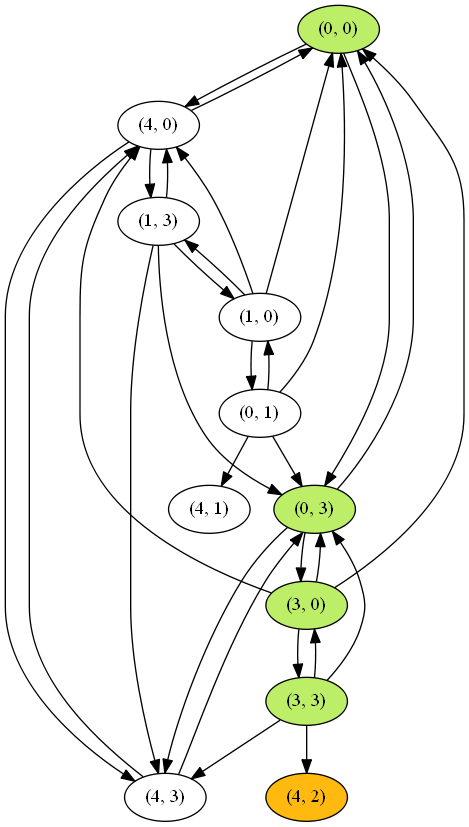

Steps


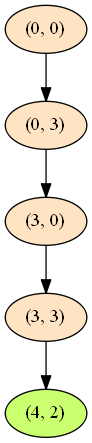

Carnister 4l: 0; Carnister 3l: 0
Carnister 4l: 0; Carnister 3l: 3
Carnister 4l: 3; Carnister 3l: 0
Carnister 4l: 3; Carnister 3l: 3
Carnister 4l: 4; Carnister 3l: 2
2l are in 3l carnister


In [748]:
waterprinting(4,3,2)

In [749]:
waterprinting(6,4,1)

There is no solution


Graph path


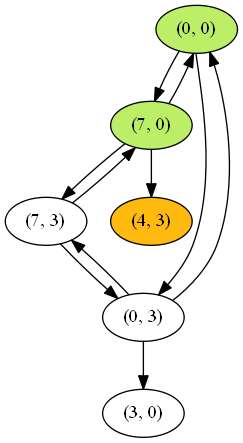

Steps


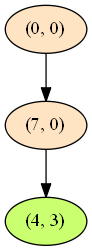

Carnister 7l: 0; Carnister 3l: 0
Carnister 7l: 7; Carnister 3l: 0
Carnister 7l: 4; Carnister 3l: 3
4l are in 7l carnister


In [750]:
waterprinting(7,3,4)

Graph path


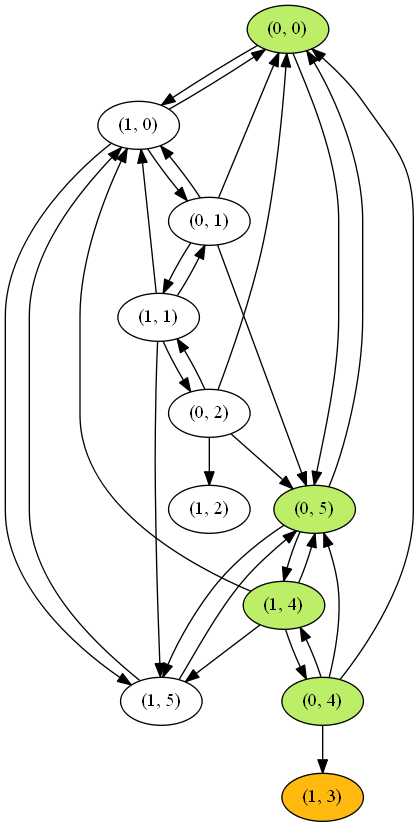

Steps


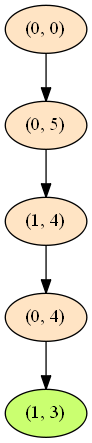

Carnister 1l: 0; Carnister 5l: 0
Carnister 1l: 0; Carnister 5l: 5
Carnister 1l: 1; Carnister 5l: 4
Carnister 1l: 0; Carnister 5l: 4
Carnister 1l: 1; Carnister 5l: 3
3l are in 5l carnister


In [751]:
waterprinting(1,5,3)